<a href="https://colab.research.google.com/github/ddovidovich/DataScienceLerning/blob/main/UNIT_02_DZ_ultra_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:
- входящий пассажир
- выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

Информацию о загрузке изображений и преобразовании их в numnpy-массивы вы можете найти в Базе знаний:



---
Дополнительная информация ([База знаний УИИ - «**Загрузка изображений**»](https://colab.research.google.com/drive/1T3i7JL1jYDPZlFT5UwC91cxUL0smehZz?usp=sharing))

---





In [1]:
# Ваше решение
# Подключение класса для создания нейронной сети прямого распространения
from tensorflow.keras.models import Sequential 
# Подключение класса для создания полносвязного слоя
from tensorflow.keras.layers import Dense 
# Подключение оптимизатора
from tensorflow.keras.optimizers import Adam 
# Подключение утилит для to_categorical
from tensorflow.keras import utils 
# Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing import image 
# Подключение библиотеки для работы с массивами
import numpy as np
# Подключение модуля для работы с файлами
import os
# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 
from PIL import Image 
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

In [3]:
# Загрузка датасета из облака
import gdown
fname = 'https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip'
gdown.download(fname, None, quiet=True)

'bus.zip'

In [4]:
import zipfile
fname = 'bus.zip'
directory = 'hw_data'
if not os.path.exists(directory):
  os.makedirs(directory)
# Распаковываем архив 
with zipfile.ZipFile(fname, 'r') as zip_ref:
  zip_ref.extractall(directory)
# Удаление архива
os.remove(fname)

In [9]:
def removeDirIfExists(base_dir,dir):
  for files in os.listdir(base_dir):
    if os.path.exists(dir):
        os.system("rm -rf "+dir)

In [5]:
import os
# Путь к директории с базой
base_dir = '/content/hw_data'
# Создание пустого списка для загрузки изображений обучающей выборки
x_data = []
# Создание списка для меток классов
y_data = []
# Задание высоты и ширины загружаемых изображений
img_height = 128
img_width = 64
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_data.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == 'Входящий':
            y_data.append(0)
        else:
            y_data.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_data = np.array(x_data)/255.
y_data = np.array(y_data)
# Вывод размерностей
print('Размер массива x_train', x_data.shape)
print('Размер массива y_train', y_data.shape)

Размер массива x_train (9081, 128, 64, 1)
Размер массива y_train (9081,)


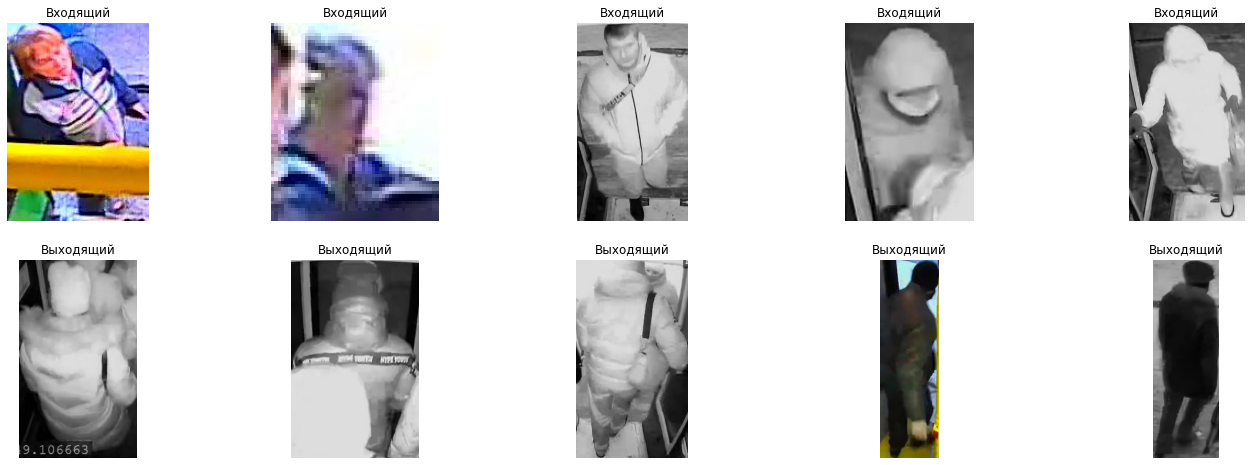

In [6]:
import random
# Вывод примеров изображений
# Получение списка классов (названия папок в директории)
folders = sorted(os.listdir(base_dir))

f, ax = plt.subplots(len(folders), 5, figsize=(24, len(folders) * 4))
for i, class_ in enumerate(folders):
    # Выбор случайного изображения
    for j in range(5):
      random_image = random.choice(
          os.listdir(os.path.join(base_dir, class_)))
      img = Image.open(os.path.join(base_dir,class_,random_image))
      ax[i, j].imshow(img)
      ax[i, j].axis('off')
      ax[i, j].set_title(class_)
plt.show() 

In [8]:
from sklearn.model_selection import train_test_split
#Разделение данных на тренировочную, тестовую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x_data, # набор параметров
                                                    y_data, # набор меток классов
                                                    test_size=0.2, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=3) # воспроизводимость

# Выведем размерность полученных выборок

print('Обучающая выборка параметров', x_train.shape)
print('Обучающая выборка меток классов', y_train.shape)
print()
print('Тестовая выборка параметров', x_test.shape)
print('Тестовая выборка меток классов', y_test.shape)

Обучающая выборка параметров (7264, 128, 64, 1)
Обучающая выборка меток классов (7264,)

Тестовая выборка параметров (1817, 128, 64, 1)
Тестовая выборка меток классов (1817,)


In [21]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout

#Создание модели
model = Sequential()
# Добавление слоев
model.add(Input(x_test.shape[1:])) 
model.add(Conv2D(128, 3, activation='relu', padding='same')) 
model.add(Dropout(0.1))
model.add(Conv2D(64, 3, activation='relu', padding='same')) 
model.add(Dropout(0.1))
model.add(Conv2D(32, 3, activation='relu', padding='same')) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(0.0001), metrics=['accuracy'])

In [22]:
# Обучение нейронной сети
history = model.fit(x_train,               # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=10,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

Epoch 1/10
727/727 [==============================] - 19s 25ms/step - loss: 0.5191 - accuracy: 0.7524 - val_loss: 0.4316 - val_accuracy: 0.8087
Epoch 2/10
727/727 [==============================] - 18s 24ms/step - loss: 0.3465 - accuracy: 0.8530 - val_loss: 0.3161 - val_accuracy: 0.8699
Epoch 3/10
727/727 [==============================] - 18s 24ms/step - loss: 0.2170 - accuracy: 0.9110 - val_loss: 0.2468 - val_accuracy: 0.9098
Epoch 4/10
727/727 [==============================] - 18s 24ms/step - loss: 0.1376 - accuracy: 0.9496 - val_loss: 0.2321 - val_accuracy: 0.9050
Epoch 5/10
727/727 [==============================] - 18s 24ms/step - loss: 0.0908 - accuracy: 0.9690 - val_loss: 0.2405 - val_accuracy: 0.9160
Epoch 6/10
727/727 [==============================] - 17s 24ms/step - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.2437 - val_accuracy: 0.9181
Epoch 7/10
727/727 [==============================] - 17s 24ms/step - loss: 0.0417 - accuracy: 0.9886 - val_loss: 0.2775 - val_accuracy:

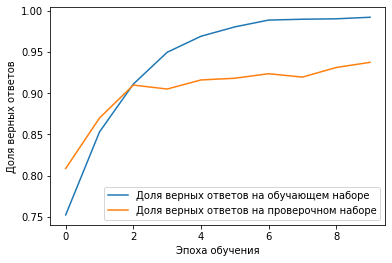

In [23]:
# Визуализация точности на обучающей выборке

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

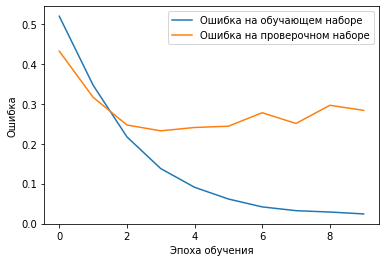

In [24]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [25]:
# Краткая сводка архитектуры модели
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 128, 64, 128)      1280      
                                                                 
 dropout_3 (Dropout)         (None, 128, 64, 128)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 128, 64, 64)       73792     
                                                                 
 dropout_4 (Dropout)         (None, 128, 64, 64)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 64, 32)       18464     
                                                                 
 flatten_3 (Flatten)         (None, 262144)            0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [26]:
# Вычисление результата (предсказания) сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

57/57 [==============================] - 2s 23ms/step - loss: 0.2528 - accuracy: 0.9400
[0.2527766227722168, 0.9400110244750977]
Доля верных ответов на тестовых данных, в процентах: 94.0011%
